In [144]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
import cmath

# QR1

# Problem 1

In [5]:
def QRdecom(A):
    i=0
    Q=np.copy(A)
    while i in range(len(Q[0,:])):
        Q[:,i]=Q[:,i]/np.linalg.norm(Q[:,i])
        for j in range(i+1, len(Q[0,:]),1):
            Q[:,j]-=np.dot(Q[:,j],Q[:,i])*Q[:,i]
        i+=1
    R=np.dot(Q.T,A)
    return Q,R
A = np.random.random((4,4))
Q,R=QRdecom(A)
np.allclose(np.triu(R), R), np.allclose(np.dot(Q.T, Q), np.identity(4)),np.allclose(np.dot(Q, R), A)

(True, True, True)

# Problem 2

In [10]:
def absdet(A):
    return abs(np.prod(np.diag(QRdecom(A)[1])))

# Problem 3

In [8]:
def solve(A, b):
    if absdet(A)==0:
        raise ValueError("A has to be invertible.")
    Q,R=QRdecom(A)
    y=np.dot(Q.T,b)
    x=np.empty_like(y)
    x[-1]=y[-1]/R[-1,-1]
    i=2
    while i <= (len(x)):
        x[-i]=(y[-i]-np.dot(R[-i,(1-i):],x[(1-i):]))/R[-i,-i]
        i+=1
    return x

# Problem 4

In [11]:
sign = lambda x: 1 if x >= 0 else -1
def hholder(A):
    n,m=len(A[0,:]), len(A[:,0])
    R=np.copy(A)
    Q=np.eye(m)
    i=0
    v=np.copy(np.empty_like(R))
    while i<n:
        v[:i,i]=0
        v[i,i]=R[i,i]+sign(R[i,i])*np.linalg.norm(R[i:,i])
        v[(i+1):,i]=R[(i+1):,i]
        H=np.eye(m-i)-2*np.dot(np.array([v[i:,i]]).T,np.array([v[i:,i]]))/(np.linalg.norm(v[i:,i])**2)
        Qnew=la.block_diag(np.eye(i),np.copy(H))
        R=np.dot(Qnew,R)
        Q=np.dot(Qnew,Q)
        i+=1
    return Q.T,R
Q,R=hholder(A)

# Problem 5

In [126]:
sign = lambda x: 1 if x >= 0 else -1
def hessenberg(A):
    n=len(A[0,:])
    H=np.copy(A)
    Q=np.eye(n)
    i=0
    v=np.copy(np.empty_like(H))
    while i<n:
        if i<n-1:
            v[:(i+1),i]=0
            v[i+1,i+1]=R[i+1,i]+sign(H[i+1,i])*np.linalg.norm(H[(i+1):,i])
            v[(i+2):,i]=H[(i+2):,i]
            Hv=np.eye(n-i-1)-2*np.dot(np.array([v[(i+1):,i]]).T,np.array([v[(i+1):,i]]))/(np.linalg.norm(v[(i+1):,i])**2)
            Qnew=la.block_diag(np.eye(i+1),np.copy(Hv))
            H=np.dot(np.dot(Qnew,H),Qnew.T)
            Q=np.dot(Qnew,Q)
            i+=1
        v[:,i]=0
        Qnew=np.eye(n)
        H=np.dot(np.dot(Qnew,H),Qnew.T)
        Q=np.dot(Qnew,Q)
        break
    return Q.T,H
hessenberg(A)

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.94348275,  0.03462453,  0.1051642 ,  0.1908987 ,
          0.09004256,  0.10474702,  0.0571646 ,  0.03678932,  0.19349102],
        [ 0.        ,  0.03462453,  0.97878775, -0.06442742, -0.1169515 ,
         -0.05516335, -0.06417184, -0.03502112, -0.02253848, -0.11853965],
        [ 0.        ,  0.1051642 , -0.06442742,  0.80431624, -0.35521381,
         -0.16754625, -0.19490749, -0.10636875, -0.06845555, -0.36003747],
        [ 0.        ,  0.1908987 , -0.1169515 , -0.35521381,  0.35520017,
         -0.30413737, -0.3538047 , -0.19308527, -0.12426355, -0.65355593],
        [ 0.        ,  0.09004256, -0.05516335, -0.16754625, -0.30413737,
          0.85654534, -0.16688161, -0.09107392, -0.05861228, -0.30826743],
        [ 0.        ,  0.10474702, -0.06417184, -0.19490749, -0.3538047 ,
         -0.16688161,  0.8058656

# QR2

# Problem 1

In [12]:
def nsolve(A,b):
    Q,R = QRdecom(A)
    x=solve(R,np.dot(Q.T,b))
    return x
nsolve(A,np.ones(4))

array([ 0.22873323,  0.08967398,  1.10528564, -0.53470082])

# Problem 2

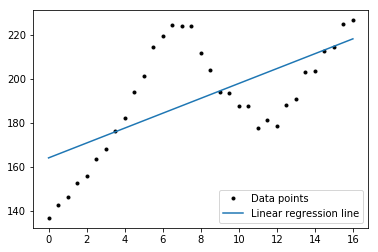

In [69]:
housing=np.load("housing.npy")
year=housing[:,0]
b=housing[:,1]
A=np.column_stack([year,np.ones(len(year))])
xsolve=nsolve(A,b)

x0=np.linspace(0,16,2)
plt.plot(year,b, 'ko', markersize=3, label='Data points')
plt.plot(x0,xsolve[0]*x+xsolve[1], label='Linear regression line')
plt.legend()
plt.show()

# Problem 3

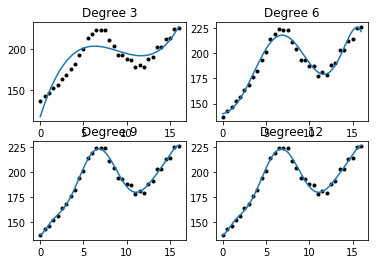

In [78]:
x=np.linspace(0,16,1000)
plt.subplot(221)
A1=np.vander(year,4)
x1=la.lstsq(A1,b)[0]
plt.plot(year,b, 'ko', markersize=3, label='Data points')
plt.plot(x,np.poly1d(x1)(x), label="Polynomial fit")
plt.title("Degree 3")

plt.subplot(222)
A2=np.vander(year,7)
x2=la.lstsq(A2,b)[0]
plt.plot(year,b, 'ko', markersize=3, label='Data points')
plt.plot(x,np.poly1d(x2)(x), label="Polynomial fit")
plt.title("Degree 6")

plt.subplot(223)
A3=np.vander(year,10)
x3=la.lstsq(A3,b)[0]
plt.plot(year,b, 'ko', markersize=3, label='Data points')
plt.plot(x,np.poly1d(x3)(x), label="Polynomial fit")
plt.title("Degree 9")

plt.subplot(224)
A4=np.vander(year,10)
x4=la.lstsq(A4,b)[0]
plt.plot(year,b, 'ko', markersize=3, label='Data points')
plt.plot(x,np.poly1d(x4)(x), label="Polynomial fit")
plt.title("Degree 12")
plt.show()



# Problem 4

In [106]:
ellipse=np.load("ellipse.npy")
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

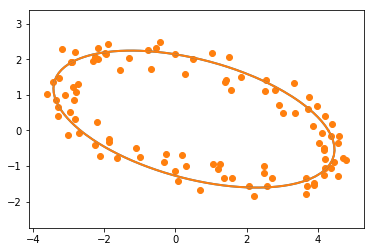

In [112]:
x=ellipse[:,0]
y=ellipse[:,1]
A=np.column_stack([x**2,x,x*y,y,y**2])
bstar=np.ones(len(x))
z=la.lstsq(A,bstar)[0]
a,b,c,d,e=tuple(z)
plot_ellipse(a,b,c,d,e)
plt.scatter(x,y)
plt.show()


# Problem 5

In [140]:
def maxeig(A,maxiter=500, tol=1e-9):
    n=len(A[0,:])
    x0=np.random.randn(n)
    x0=x0/np.linalg.norm(x0)
    i=0
    x=np.zeros(n)
    xnew=x0
    while i<maxiter and np.linalg.norm(x-xnew)>tol:
        i+=1
        x=xnew
        xnew=np.dot(A,x)
        xnew=xnew/np.linalg.norm(xnew)
    return np.dot(np.dot(xnew,A),xnew), xnew
A = np.random.random((5,5))
maxeig(A)

(2.3103325868368363,
 array([ 0.53619495,  0.30482649,  0.52992424,  0.42609737,  0.39648092]))

# Problem 6

In [161]:
def alleigs(A,maxiter=1000, tol=1e-9):
    n=len(A[0,:])
    S=la.hessenberg(A)
    i=0
    while i<maxiter:
        i+=1
        Q,R=QRdecom(S)
        S=np.dot(R,Q)
    j=0
    eigs=[]
    while j<n:
        if j==n-1:
            eigs.append([S[j,j]])
            j+=1
        if j<n-1 and S[j+1,j]<tol:
            eigs.append([S[j,j]])
            j+=1
        if j< n-1 and S[j+1,j]>=tol:
            T=S[j:(j+2),j:(j+2)]
            a,b,c,d=(T[0,0],T[0,1],T[1,0],T[1,1])
            delta=(a+d)**2-4*(a*d-b*c)
            lambda1=(a+d+cmath.sqrt(delta))/2
            lambda2=(a+d-cmath.sqrt(delta))/2
            eigs.append([lambda1,lambda2])
            j+=1
    return eigs
alleigs(A)

[[2.3103325868994249],
 [(-0.36233076549240717+0.19126654685279543j),
  (-0.36233076549240717-0.19126654685279543j)],
 [-0.35330026512386492],
 [0.067351374652549825],
 [0.37731570954542865]]